## Setup

### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Mon Jul 28 12:57:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [3]:
%pip install "ultralytics<=8.3.40" supervision roboflow
# prevent ultralytics from tracking your activity
!yolo settings sync=False
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.4/112.6 GB disk)


### Upload data from roboflow

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata

/content/datasets


In [8]:
from roboflow import Roboflow

roboflow_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=roboflow_API_KEY)

project = rf.workspace("myprojects-0vg27").project("x-ray-id-aox4j")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to X-Ray-ID-1 in yolov11:: 100%|██████████| 7690/7690 [00:00<00:00, 10684.19it/s]


In [9]:
print(dataset.location)

/content/datasets/X-Ray-ID-1


In [10]:
!cd {HOME}
!yolo task=detect mode=train model=yolo11n.pt data={dataset.location}/data.yaml epochs=10 batch=32 plots=True

100% 5.35M/5.35M [00:00<00:00, 92.9MB/s]
New https://pypi.org/project/ultralytics/8.3.170 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/datasets/X-Ray-ID-1/data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, re

**NOTE:** Result annotated image got saved in `{HOME}/runs/detect/predict/`. Let's display it.

In [14]:
HOME

'/content'

In [15]:
!ls {HOME}/datasets/runs/detect/train/

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1753708571.e7087b20d7dc.7403.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


In [21]:
PATH = f'{HOME}/datasets/runs/detect/train/'

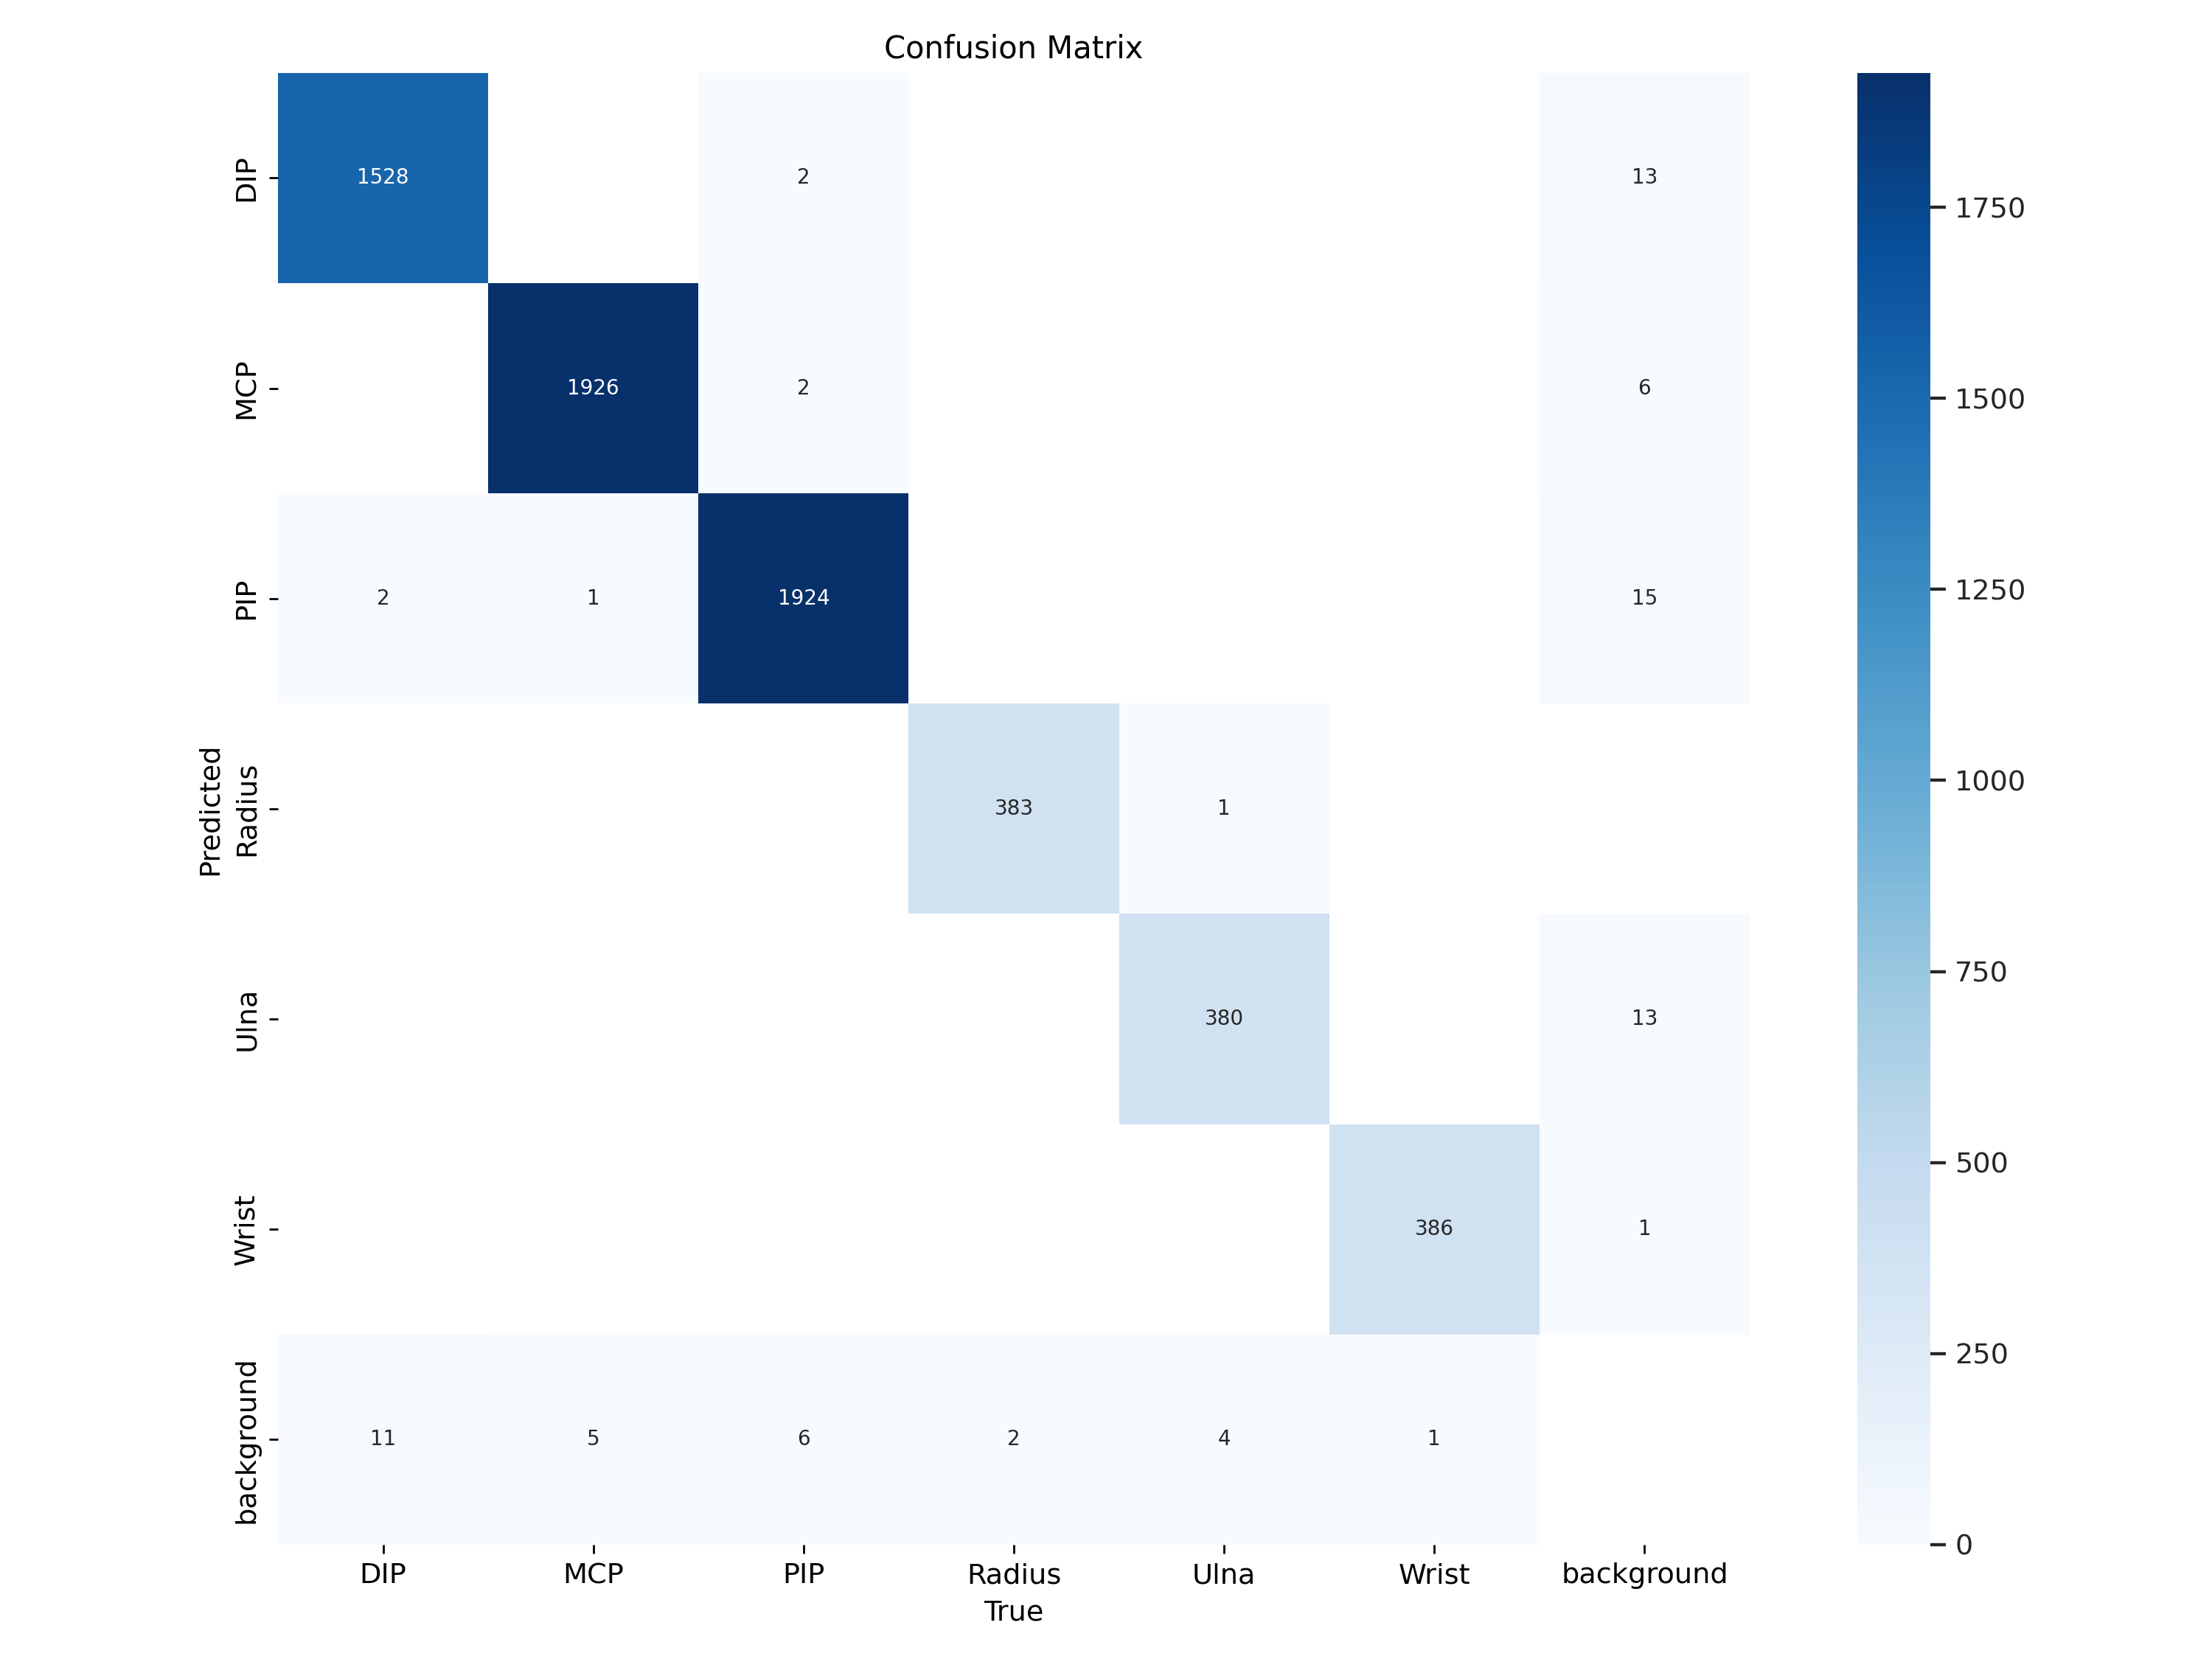

In [16]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/datasets/runs/detect/train/confusion_matrix.png', width=600)

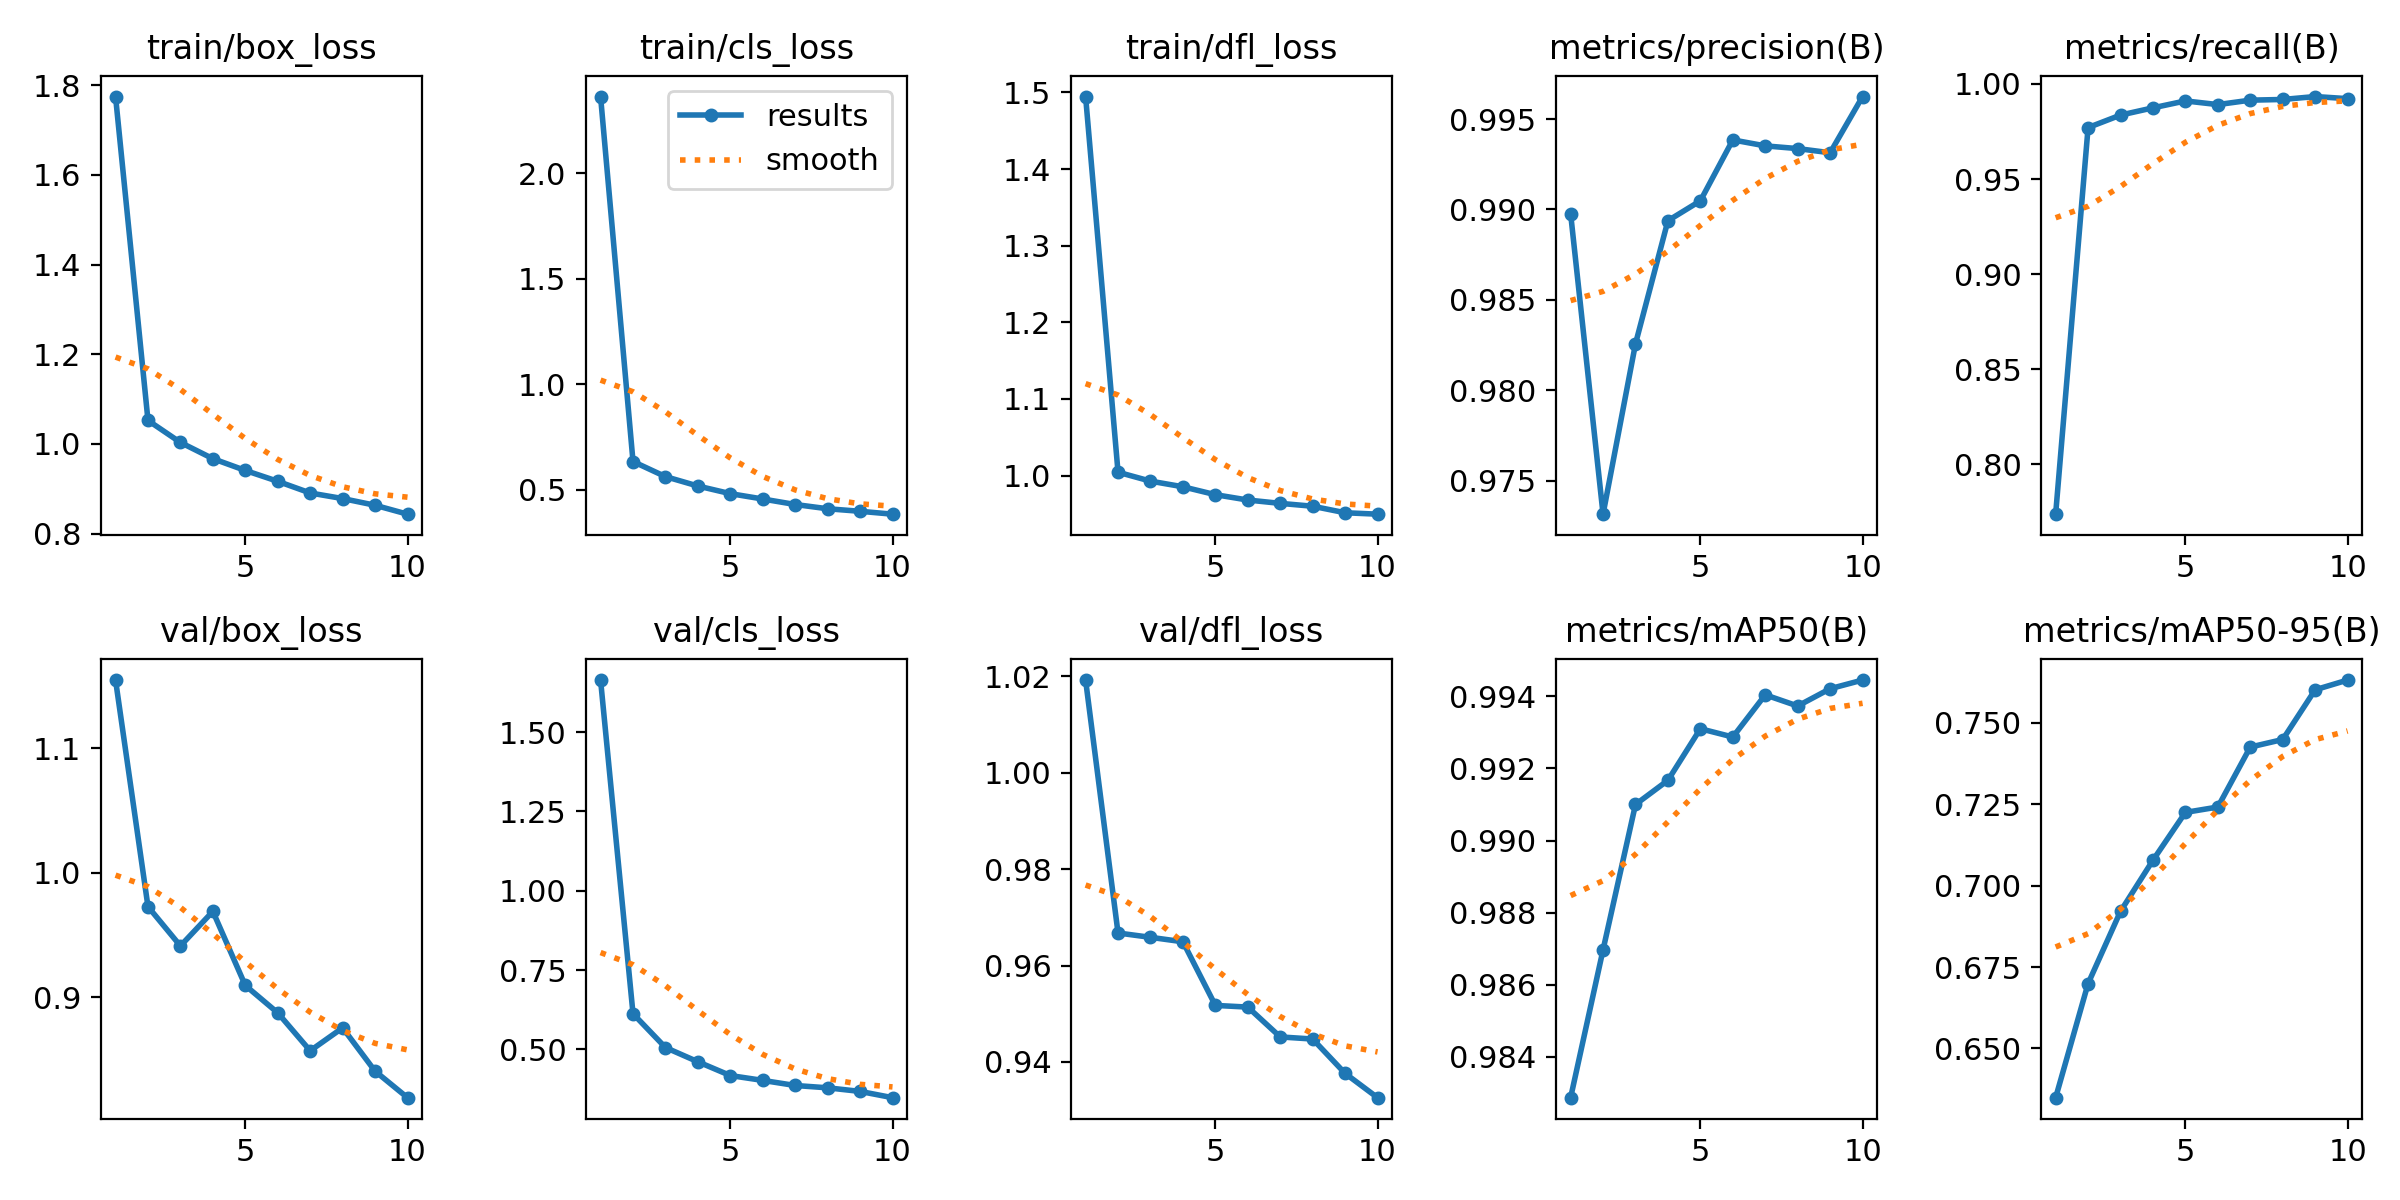

In [17]:
IPyImage(filename=f'{HOME}/datasets/runs/detect/train/results.png', width=600)

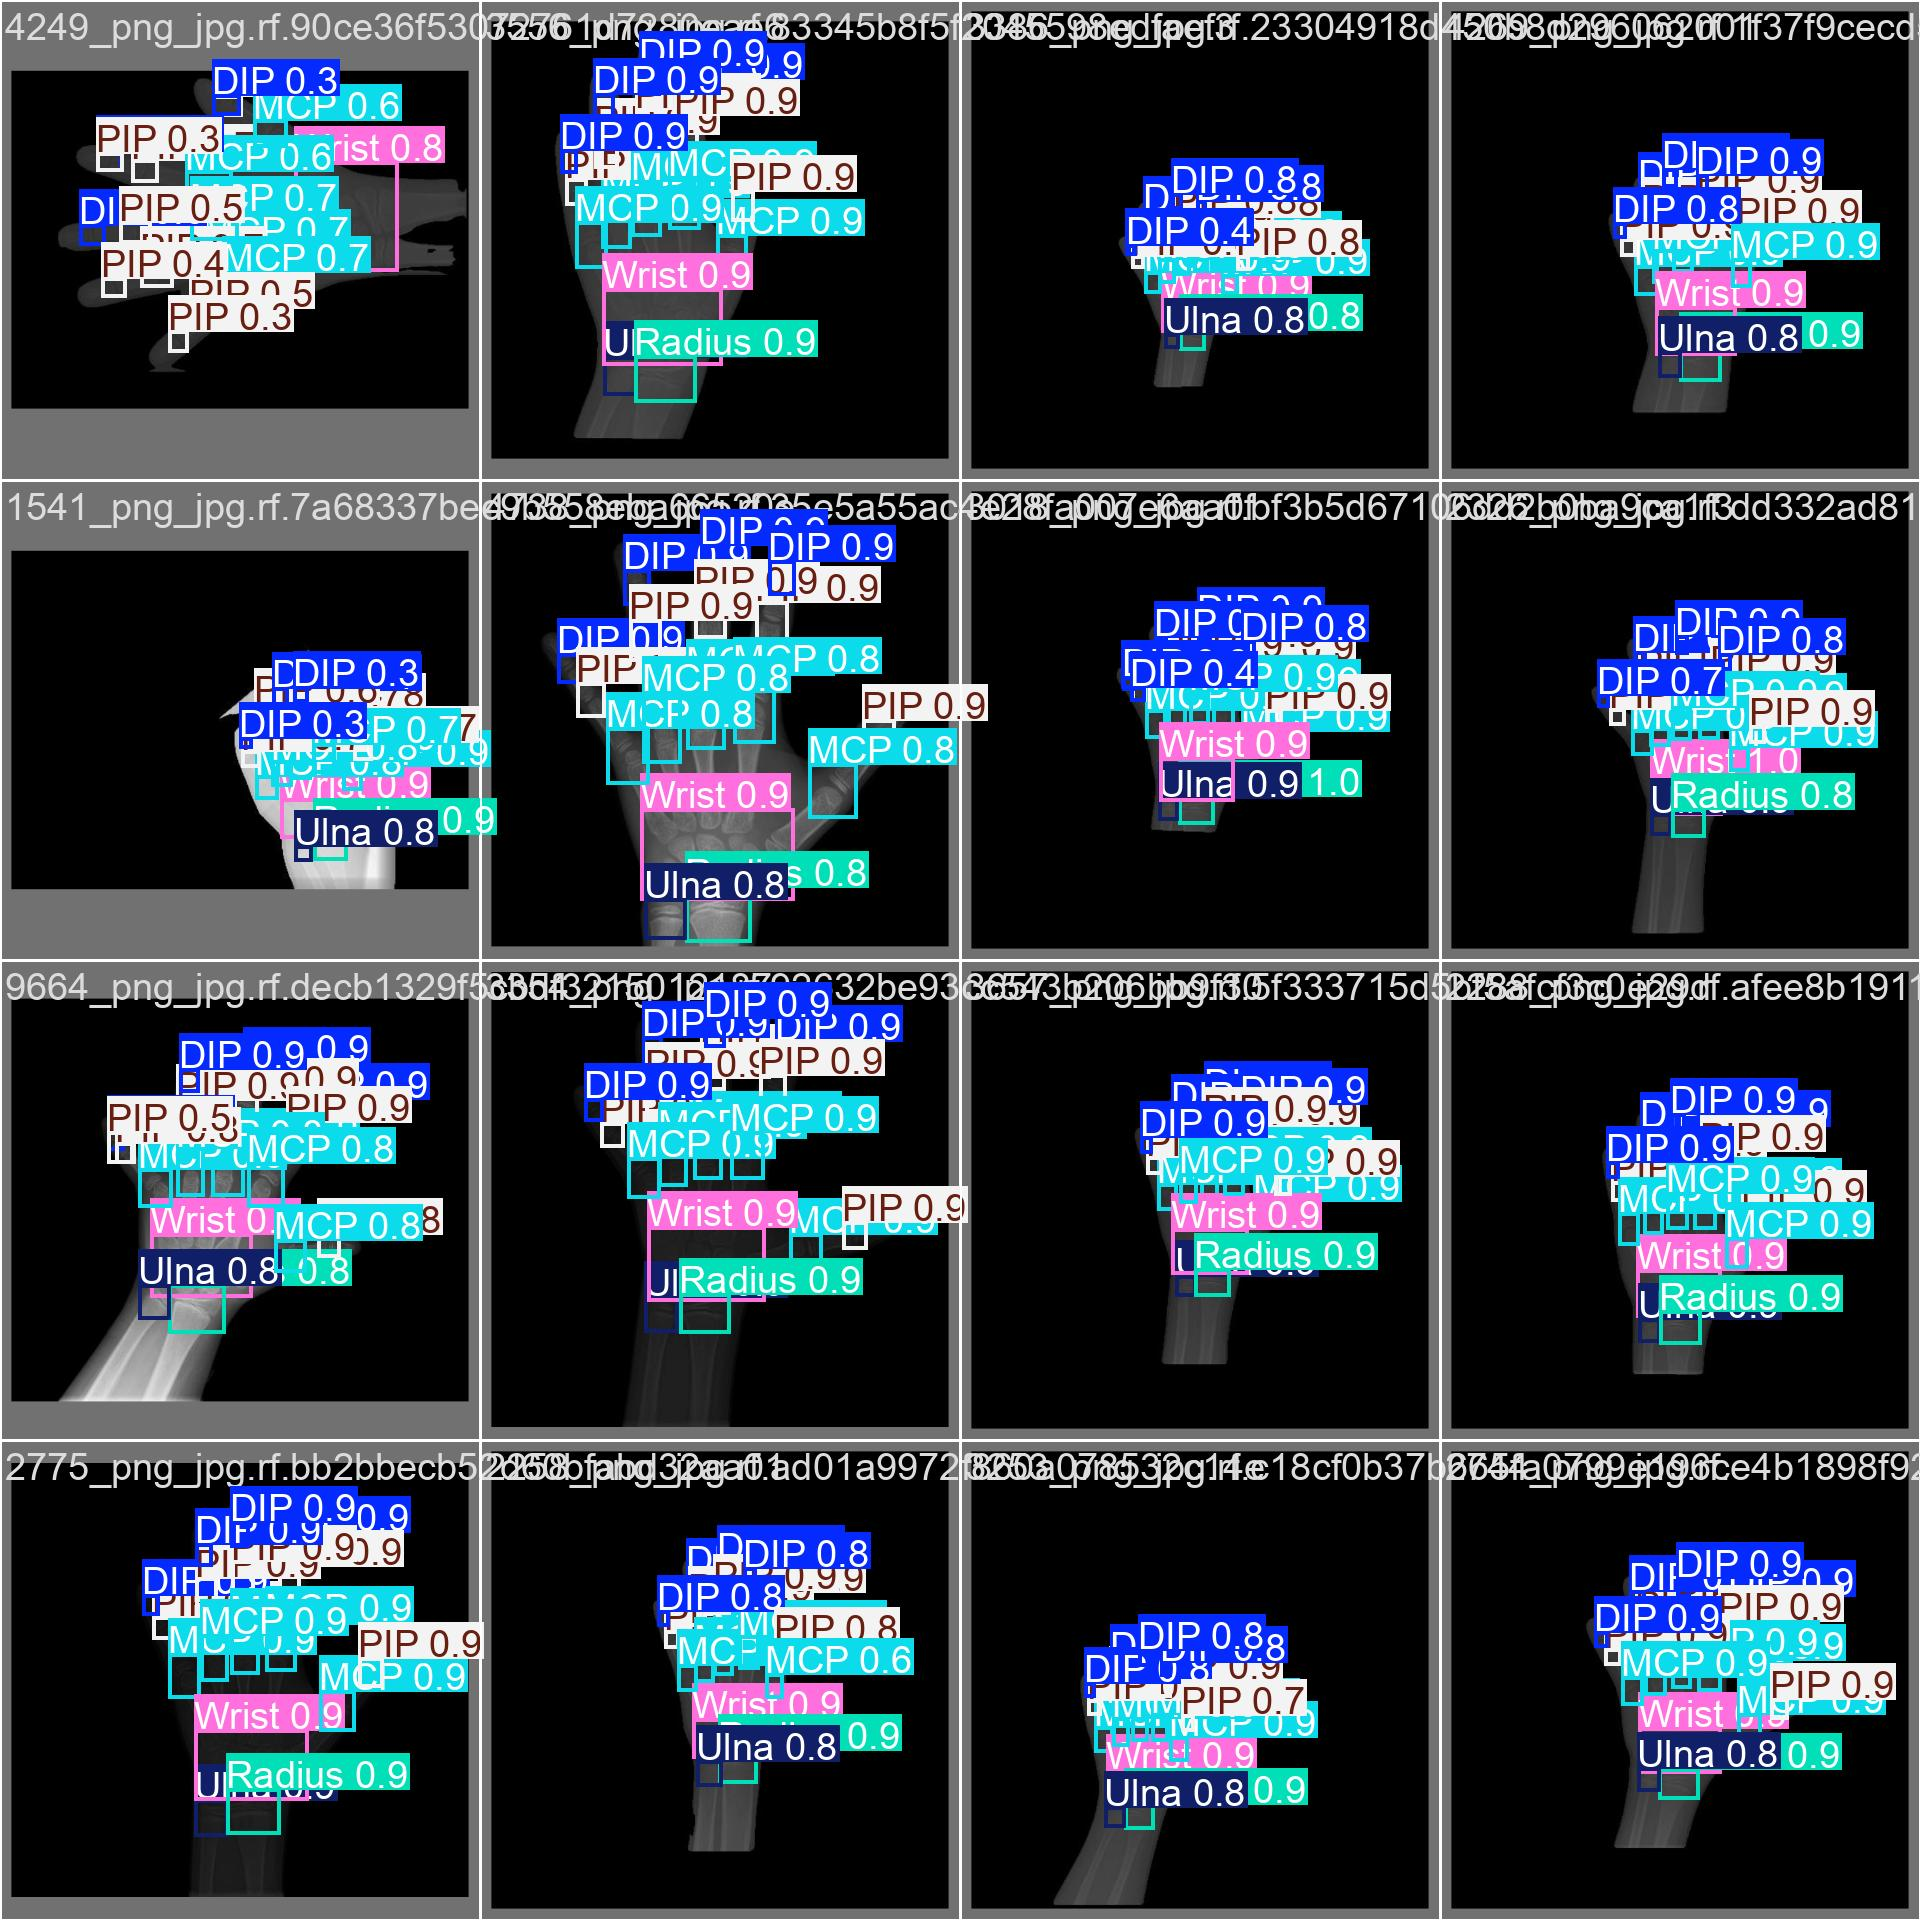

In [19]:
IPyImage(filename=f'{HOME}/datasets/runs/detect/train/val_batch0_pred.jpg', width=600)

In [27]:
!cd {HOME}
!yolo task=detect mode=val model= /content/datasets/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/datasets/X-Ray-ID-1/valid/labels.cache... 387 images, 0 backgrounds, 0 corrupt: 100% 387/387 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 25/25 [00:05<00:00,  4.26it/s]
                   all        387       6564      0.996      0.993      0.994      0.763
                   DIP        387       1541      0.998       0.99      0.995      0.737
                   MCP        387       1932      0.997      0.996      0.994      0.778
                   PIP        387       1934      0.996      0.992      0.995      0.757
                Radius        385        385          1      0.995      0.995       0.75
                  Ulna        385        385      0.987      0.987      0.992      0.702
                 Wrist        387        3

## Fine-tune YOLO11 on custom dataset

## Custom Training

## Validate fine-tuned model

## Inference with custom model

In [29]:
!yolo task=detect mode=predict model=/content/datasets/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs

image 1/388 /content/datasets/X-Ray-ID-1/test/images/1403_png_jpg.rf.cae43c14f768dc1f9ecce724dc7b0103.jpg: 640x480 4 DIPs, 5 MCPs, 5 PIPs, 1 Radius, 1 Ulna, 1 Wrist, 43.3ms
image 2/388 /content/datasets/X-Ray-ID-1/test/images/1406_png_jpg.rf.807b16e632c2e267901f772cd6e6bae4.jpg: 640x480 4 DIPs, 5 MCPs, 5 PIPs, 1 Radius, 1 Ulna, 1 Wrist, 8.6ms
image 3/388 /content/datasets/X-Ray-ID-1/test/images/1412_png_jpg.rf.cdb69419cbbcb91938ef735039c649ef.jpg: 640x480 4 DIPs, 5 MCPs, 5 PIPs, 1 Radius, 1 Ulna, 1 Wrist, 8.1ms
image 4/388 /content/datasets/X-Ray-ID-1/test/images/1416_png_jpg.rf.14b77e075fa10f9f3ed3e2e6dec79477.jpg: 640x480 4 DIPs, 5 MCPs, 5 PIPs, 1 Wrist, 7.7ms
image 5/388 /content/datasets/X-Ray-ID-1/test/images/1426_png_jpg.rf.a9e52eae32774271b15240797cc4ffa0.jpg: 640x480 4 DIPs, 5 MCPs, 4 PIPs, 1 Radius, 1 Ulna, 1 Wris

**NOTE:** Let's take a look at few results.

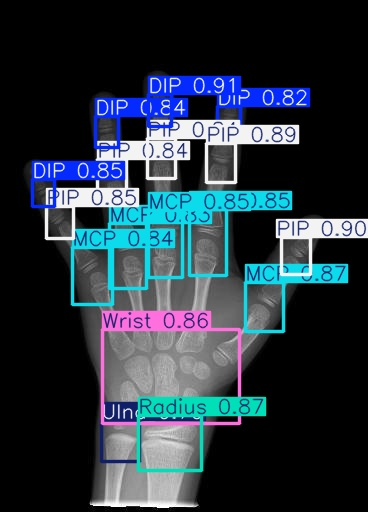

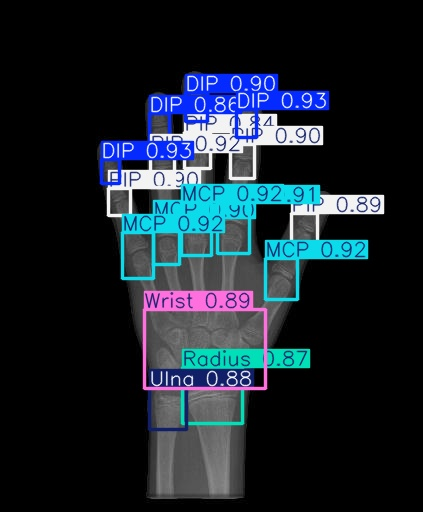

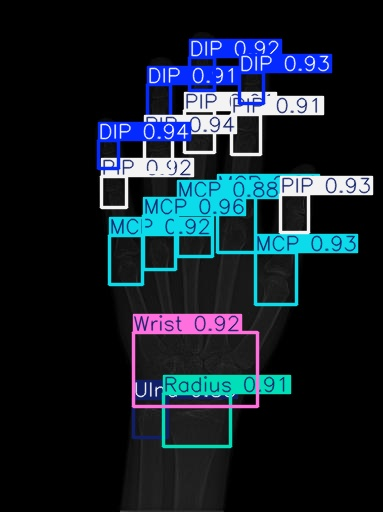

In [31]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/datasets/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")